# **--------------------------- IMPORTING LIBRARIES ---------------------------**

In [1]:
import pandas as pds
# pandas : used for working with and manipulating databases
# sklearn : machine learning library for python
from sklearn.cluster import KMeans
# matplotlib : python low level graph plotting library
import matplotlib.pyplot as plot_graph

# **--------------------------- IMPORTING DATABASE ---------------------------**

In [2]:
customer_info = pds.read_csv("/content/Mall_Customers.csv")

# **--------------------------- CHECKING ON THE DATABASE ---------------------------**

In [ ]:
print("\n->\tTo take an idea about what type of Database we are dealing with : ")
print(customer_info.head())


->	To take an idea about what type of Database we are dealing with : 
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [ ]:
print("\n->\tTo check 6 sample data from the given Database : ")
print(customer_info.sample(6))


->	To check 6 sample data from the given Database : 
     CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
7             8  Female   23                  18                      94
189         190  Female   36                 103                      85
39           40  Female   20                  37                      75
142         143  Female   28                  76                      40
27           28    Male   35                  28                      61
143         144  Female   32                  76                      87


In [ ]:
print("\n->\tTo check the dimensions of the Database : ", end=" ")
print(customer_info.shape)


->	To check the dimensions of the Database :  (200, 5)


In [ ]:
print("\n->\tTo get the information about the Database : ")
print(customer_info.info())


->	To get the information about the Database : 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


In [ ]:
print("\n->\tTo check whether if the Database contains any Empty value : ")
print(customer_info.isnull().sum())


->	To check whether if the Database contains any Empty value : 
CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


### **-------------------------- Segmentation on the basis of Annual Income and Spending Score --------------------------**

In [3]:
train = customer_info.iloc[:, [3, 4]]
train = train.values
WCSS = []
# wcss : Within Cell Sum of Square
for i in range(1, 15):
      kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0)
      kmeans.fit(train)
      WCSS.append(kmeans.inertia_)

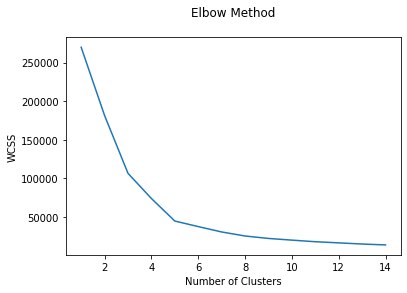

In [4]:
# Plotting the elbow graph
plot_graph.plot(range(1, 15), WCSS)
plot_graph.title('Elbow Method\n')
plot_graph.xlabel('Number of Clusters')
plot_graph.ylabel('WCSS')
plot_graph.show()

In [5]:
# Training the model
kmeansmodel = KMeans(n_clusters=5, init='k-means++', random_state=0)
y_kmeans = kmeansmodel.fit_predict(train)

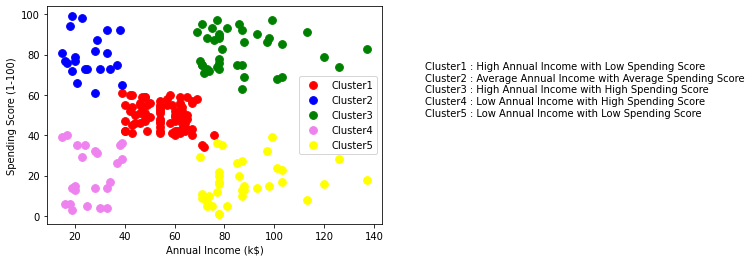

In [6]:
# Scatter Graph Plot
plot_graph.scatter(train[y_kmeans == 0, 0], train[y_kmeans == 0, 1], s=60, c='red', label='Cluster1')
plot_graph.scatter(train[y_kmeans == 1, 0], train[y_kmeans == 1, 1], s=60, c='blue', label='Cluster2')
plot_graph.scatter(train[y_kmeans == 2, 0], train[y_kmeans == 2, 1], s=60, c='green', label='Cluster3')
plot_graph.scatter(train[y_kmeans == 3, 0], train[y_kmeans == 3, 1], s=60, c='violet', label='Cluster4')
plot_graph.scatter(train[y_kmeans == 4, 0], train[y_kmeans == 4, 1], s=60, c='yellow', label='Cluster5')
# plot_graph.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='black', label='Centroids')
plot_graph.xlabel('Annual Income (k$)')
plot_graph.ylabel('Spending Score (1-100)')
plot_graph.figtext(1, 0.5,
                       "Cluster1 : High Annual Income with Low Spending Score\nCluster2 : Average Annual Income with Average Spending Score "
                       "\nCluster3 : High Annual Income with High Spending Score\nCluster4 : Low Annual Income with High Spending Score\nCluster5 : Low Annual Income with Low Spending Score")
plot_graph.legend()
plot_graph.show()

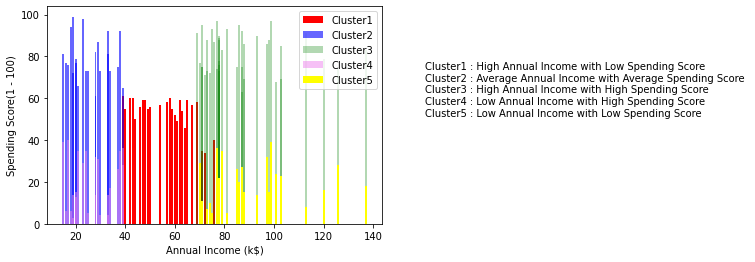

In [7]:
# Bar Graph Plot
plot_graph.bar(train[y_kmeans == 0, 0], train[y_kmeans == 0, 1], color='red', label='Cluster1')
plot_graph.bar(train[y_kmeans == 1, 0], train[y_kmeans == 1, 1], color='blue', label='Cluster2', alpha=0.6)
plot_graph.bar(train[y_kmeans == 2, 0], train[y_kmeans == 2, 1], color='green', label='Cluster3', alpha=0.3)
plot_graph.bar(train[y_kmeans == 3, 0], train[y_kmeans == 3, 1], color='violet', label='Cluster4', alpha=0.5)
plot_graph.bar(train[y_kmeans == 4, 0], train[y_kmeans == 4, 1], color='yellow', label='Cluster5')
plot_graph.xlabel('Annual Income (k$)')
plot_graph.ylabel('Spending Score(1 - 100)')
plot_graph.legend()
plot_graph.figtext(1, 0.5,
                       "Cluster1 : High Annual Income with Low Spending Score\nCluster2 : Average Annual Income with Average Spending Score "
                       "\nCluster3 : High Annual Income with High Spending Score\nCluster4 : Low Annual Income with High Spending Score\nCluster5 : Low Annual Income with Low Spending Score")
plot_graph.show()

### **--------------------------- Segmentation on the basis of Age and Annual Income ---------------------------**

In [8]:
# Function for Segmentation on the basis of Age and Annual Income
train1 = customer_info.iloc[:, [2, 3]]
train1 = train1.values
# from sklearn.cluster import KMeans

WCSS1 = []  # WCSS = Within Cell Sum of Square
for i in range(1, 15):
        kmeans1 = KMeans(n_clusters=i, init='k-means++', random_state=0)
        kmeans1.fit(train1)
        WCSS1.append(kmeans1.inertia_)

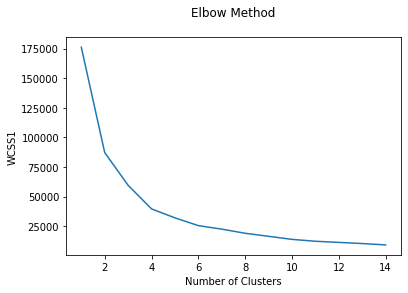

In [9]:
# Plotting the elbow graph
plot_graph.plot(range(1, 15), WCSS1)
plot_graph.title('Elbow Method\n')
plot_graph.xlabel('Number of Clusters')
plot_graph.ylabel('WCSS1')
plot_graph.show()

In [10]:
# Training the model
kmeansmodel1 = KMeans(n_clusters=4, init='k-means++', random_state=0)
y_kmeans1 = kmeansmodel1.fit_predict(train1)

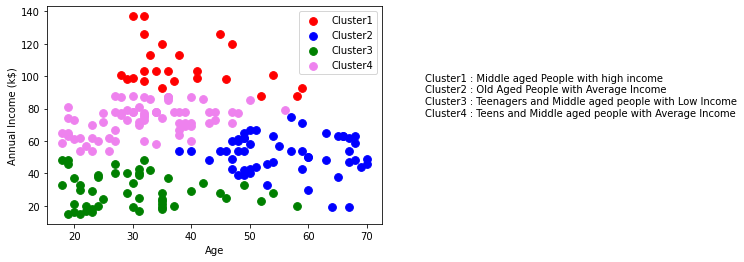

In [11]:
# Scatter Graph Plot
plot_graph.scatter(train1[y_kmeans1 == 0, 0], train1[y_kmeans1 == 0, 1], s=60, c='red', label='Cluster1')
plot_graph.scatter(train1[y_kmeans1 == 1, 0], train1[y_kmeans1 == 1, 1], s=60, c='blue', label='Cluster2')
plot_graph.scatter(train1[y_kmeans1 == 2, 0], train1[y_kmeans1 == 2, 1], s=60, c='green', label='Cluster3')
plot_graph.scatter(train1[y_kmeans1 == 3, 0], train1[y_kmeans1 == 3, 1], s=60, c='violet', label='Cluster4')
# plot_graph.scatter(kmeans1.cluster_centers_[:, 0], kmeans1.cluster_centers_[:, 1], s=100, c='black', label='Centroids')
plot_graph.xlabel('Age')
plot_graph.ylabel('Annual Income (k$)')
plot_graph.figtext(1, 0.5,
                       "Cluster1 : Middle aged People with high income\nCluster2 : Old Aged People with Average Income"
                       "\nCluster3 : Teenagers and Middle aged people with Low Income\nCluster4 : Teens and Middle aged people with Average Income")
plot_graph.legend()
plot_graph.show()

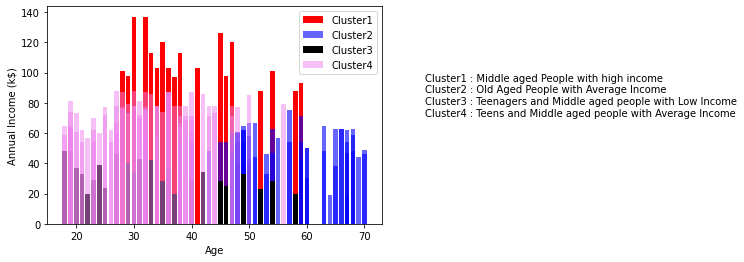

In [12]:
# Bar Graph Plot
plot_graph.bar(train1[y_kmeans1 == 0, 0], train1[y_kmeans1 == 0, 1], color='red', label='Cluster1')
plot_graph.bar(train1[y_kmeans1 == 1, 0], train1[y_kmeans1 == 1, 1], color='blue', label='Cluster2', alpha=0.6)
plot_graph.bar(train1[y_kmeans1 == 2, 0], train1[y_kmeans1 == 2, 1], color='black', label='Cluster3')
plot_graph.bar(train1[y_kmeans1 == 3, 0], train1[y_kmeans1 == 3, 1], color='violet', label='Cluster4', alpha=0.5)
plot_graph.xlabel('Age')
plot_graph.ylabel('Annual Income (k$)')
plot_graph.legend()
plot_graph.figtext(1, 0.5,
                       "Cluster1 : Middle aged People with high income\nCluster2 : Old Aged People with Average Income"
                       "\nCluster3 : Teenagers and Middle aged people with Low Income\nCluster4 : Teens and Middle aged people with Average Income")
plot_graph.show()

### **--------------------------- Segmentation on the basis of Age and Spending Score ---------------------------**

In [13]:
# Function for Segmentation on the basis of Age and Spending Score
train2 = customer_info.iloc[:, [2, 3]]
train2 = train2.values
# from sklearn.cluster import KMeans  # Age and SC
WCSS2 = []  # WCSS = Within Cell Sum of Square
for i in range(1, 15):
        kmeans2 = KMeans(n_clusters=i, init='k-means++', random_state=0)
        kmeans2.fit(train2)
        WCSS2.append(kmeans2.inertia_)

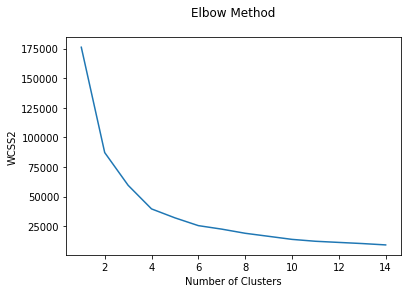

In [14]:
# Plotting Elbow Graph
plot_graph.plot(range(1, 15), WCSS2)
plot_graph.title('Elbow Method\n')
plot_graph.xlabel('Number of Clusters')
plot_graph.ylabel('WCSS2')
plot_graph.show()


In [15]:
# Training the model
kmeansmodel2 = KMeans(n_clusters=6, init='k-means++', random_state=0)
y_kmeans2 = kmeansmodel2.fit_predict(train2)


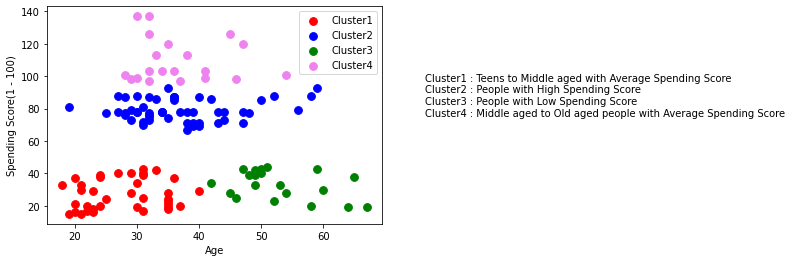

In [16]:
# Scatter Graph Plot
plot_graph.scatter(train2[y_kmeans2 == 0, 0], train2[y_kmeans2 == 0, 1], s=60, c='red', label='Cluster1')
plot_graph.scatter(train2[y_kmeans2 == 1, 0], train2[y_kmeans2 == 1, 1], s=60, c='blue', label='Cluster2')
plot_graph.scatter(train2[y_kmeans2 == 2, 0], train2[y_kmeans2 == 2, 1], s=60, c='green', label='Cluster3')
plot_graph.scatter(train2[y_kmeans2 == 3, 0], train2[y_kmeans2 == 3, 1], s=60, c='violet', label='Cluster4')
# plot_graph.scatter(kmeans2.cluster_centers_[:, 0], kmeans2.cluster_centers_[:, 1], s=100, c='black', label='Centroids')
plot_graph.xlabel('Age')
plot_graph.ylabel('Spending Score(1 - 100)')
plot_graph.figtext(1, 0.5, "Cluster1 : Teens to Middle aged with Average Spending Score\nCluster2 : People with High Spending Score"
                       "\nCluster3 : People with Low Spending Score\nCluster4 : Middle aged to Old aged people with Average Spending Score")
plot_graph.legend()
plot_graph.show()


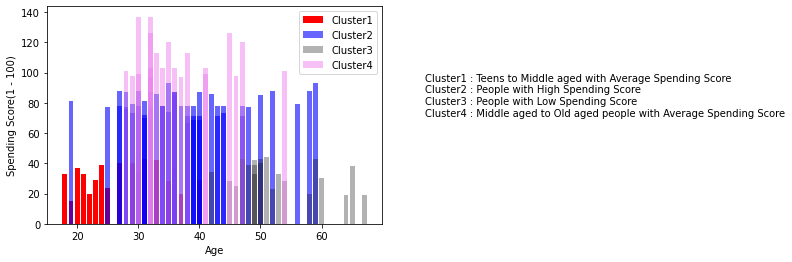

In [17]:
# Bar Graph Plot
plot_graph.bar(train2[y_kmeans2 == 0, 0], train2[y_kmeans2 == 0, 1], color='red', label='Cluster1')
plot_graph.bar(train2[y_kmeans2 == 1, 0], train2[y_kmeans2 == 1, 1], color='blue', label='Cluster2', alpha=0.6)
plot_graph.bar(train2[y_kmeans2 == 2, 0], train2[y_kmeans2 == 2, 1], color='black', label='Cluster3', alpha=0.3)
plot_graph.bar(train2[y_kmeans2 == 3, 0], train2[y_kmeans2 == 3, 1], color='violet', label='Cluster4', alpha=0.5)
plot_graph.xlabel('Age')
plot_graph.ylabel('Spending Score(1 - 100)')
plot_graph.legend()
plot_graph.figtext(1, 0.5,
                       "Cluster1 : Teens to Middle aged with Average Spending Score\nCluster2 : People with High Spending Score "
                       "\nCluster3 : People with Low Spending Score\nCluster4 : Middle aged to Old aged people with Average Spending Score")
plot_graph.show()